In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)

# Import the data

In [2]:
player_df = pd.read_csv('./data/nhl-player-data.csv')
team_df = pd.read_csv('./data/nhl-teams.csv')

## Rename columns based on provided README to make them more approachable

In [3]:
player_df = player_df.rename({
    'Rk': 'rank',
    'Age': 'age',
    'Player': 'player',
    'Pos': 'position',
    'Tm': 'team',
    'GP': 'games_played',
    'G': 'goals',
    'A': 'assists',
    'PTS': 'points',
    'plusminus': 'plus_minus',
    'PIM': 'penalty_minutes',
    'PS': 'team_points_ratio',
    'EV': 'num_goals_5on5',
    'PP': 'num_goals_powerplay',
    'SH': 'num_goals_shorthanded',
    'GW': 'num_goals_gamewinning',
    'EV.1': 'num_assists_5on5',
    'PP.1': 'num_assists_powerplay',
    'SH.1': 'num_assists_shorthanded',
    'GW.1': 'num_assists_gamewinning',
    'S': 'shoots_on_goal',
    'S_percent': 'shoot_success_rate',
    'TOI': 'time_on_ice',
    'ATOI': 'average_time_on_ice',
    'BLK': 'num_blocked_shots',
    'HIT': 'num_hits',
    'FOW': 'faceoff_wins',
    'FOL': 'faceoff_losses',
    'FO_percent': 'faceoff_success_rate',
    'HART': 'num_HT_wins',
    'Votes': 'num_HT_votes',
    'Season': 'season'
}, axis=1)

In [8]:
player_df

,rank,player,age,position,team,games_played,goals,assists,points,plus_minus,penalty_minutes,team_points_ratio,num_goals_5on5,num_goals_powerplay,num_goals_shorthanded,num_goals_gamewinning,num_assists_5on5,num_assists_powerplay,num_assists_shorthanded,shoots_on_goal,shoot_success_rate,time_on_ice,average_time_on_ice,num_blocked_shots,num_hits,faceoff_wins,faceoff_losses,faceoff_success_rate,num_HT_wins,num_HT_votes,season
0,1,Connor McDavid,20,C,EDM,82,30,70,100,27,26,12.8,26,3,1,6,45,24,1,251,12.0,1733,21.133333,29.0,34,348.0,458.0,43.2,1,1604,2017
1,2,Sidney Crosby,29,C,PIT,75,44,45,89,17,24,12.3,30,14,0,5,34,11,0,255,17.3,1491,19.883333,27.0,80,842.0,906.0,48.2,0,1104,2017
2,3,Patrick Kane,28,RW,CHI,82,34,55,89,11,32,10.8,27,7,0,5,39,16,0,292,11.6,1754,21.400000,15.0,28,7.0,44.0,13.7,0,206,2017
3,4,Nicklas Backstrom,29,C,WSH,82,23,63,86,17,38,9.9,15,8,0,5,36,27,0,162,14.2,1497,18.266667,33.0,45,685.0,648.0,51.4,0,60,2017
4,5,Nikita Kucherov,23,RW,TBL,74,40,45,85,13,38,12.0,23,17,0,7,30,15,0,246,16.3,1438,19.433333,20.0,30,0.0,0.0,0.0,0,119,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12323,886,Zach Trotman,27,D,PIT,3,0,0,0,-3,0,-0.2,0,0,0,0,0,0,0,6,0.0,38,12.800000,2.0,1,0.0,0.0,NaN,0,0,2018
12324,887,Dominic Turgeon,21,C,DET,5,0,0,0,-2,2,-0.2,0,0,0,0,0,0,0,3,0.0,46,9.200000,8.0,3,7.0,14.0,33.3,0,0,2018
12325,888,Rinat Valiev,22,D,MTL,2,0,0,0,0,2,0.0,0,0,0,0,0,0,0,2,0.0,24,11.800000,2.0,0,0.0,0.0,NaN,0,0,2018
12326,889,Curtis Valk,24,LW,FLA,1,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,NaN,3,3.400000,0.0,1,0.0,3.0,0.0,0,0,2018


## Drop evidently useless columns

In [4]:
player_df.drop('Nick', axis=1, inplace=True, errors='ignore')

# 1. Basic data exploration

First let's have a look at basic data visualization of the variables we are interested in.

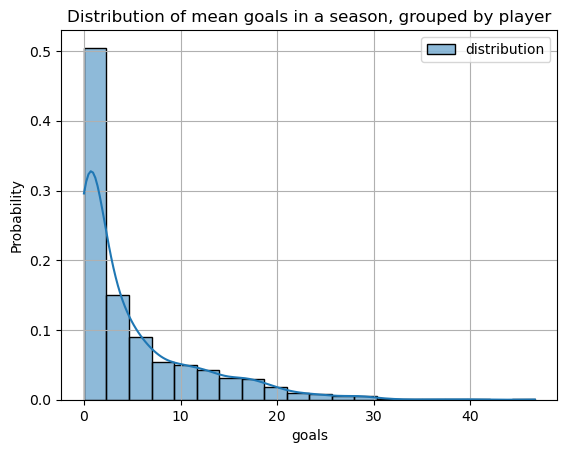

In [69]:
fig, ax = plt.subplots()
sns.histplot(player_df.groupby('player').agg({'goals': 'mean'})['goals'],
             stat='probability',
             bins=20,
             kde=True,
             ax=ax,
             label='distribution')
ax.grid()
ax.legend()
ax.plot()
ax.set_title('Distribution of mean goals in a season, grouped by player');

Now let's explore the correlation between the number of goals scored and other (numerical) variables.

''

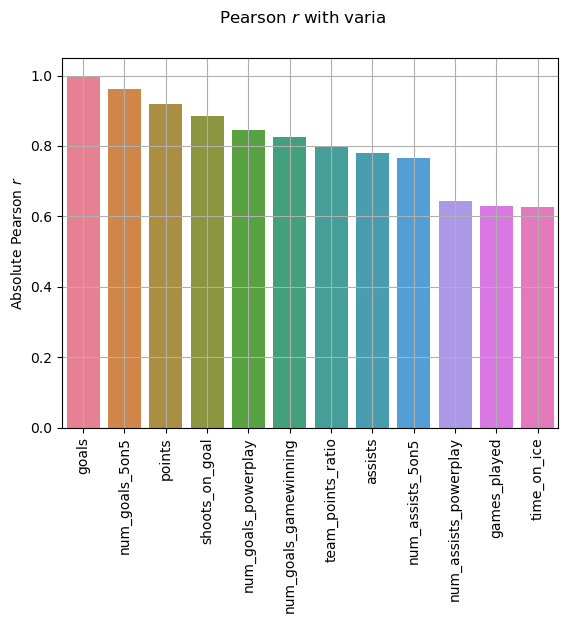

In [113]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

goal_corr_df = pd.DataFrame(player_df.select_dtypes(include=numerics).corr()['goals'].sort_values(ascending=False))
plot_df = goal_corr_df[goal_corr_df.goals.abs() > 0.5]
sns.barplot(plot_df.T)
plt.xticks(rotation=90)
plt.ylabel(rf'Absolute Pearson $r$')
plt.suptitle(rf'$r$ with varia')
plt.grid()
;